In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

file_path = (
    "/Volumes/maven_training_databricks/default-ccc/default_of_credit_card_clients/default_of_credit_card_clients.csv"
)

df = spark.read.load(file_path, format="csv", header="true", delimiter=";", inferSchema="true")
df = df.toPandas()

In [24]:
# Aperçu des données
display(df.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
# Informations générales
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int32
 1   LIMIT_BAL                   30000 non-null  int32
 2   SEX                         30000 non-null  int32
 3   EDUCATION                   30000 non-null  int32
 4   MARRIAGE                    30000 non-null  int32
 5   AGE                         30000 non-null  int32
 6   PAY_0                       30000 non-null  int32
 7   PAY_2                       30000 non-null  int32
 8   PAY_3                       30000 non-null  int32
 9   PAY_4                       30000 non-null  int32
 10  PAY_5                       30000 non-null  int32
 11  PAY_6                       30000 non-null  int32
 12  BILL_AMT1                   30000 non-null  int32
 13  BILL_AMT2                   30000 non-null  int32
 14  BILL_A

None

In [10]:
# Statistiques descriptives
display(df.describe())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,30000,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [26]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

Series([], dtype: int64)

In [30]:
# Identification des colonnes
cat_cols = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
num_cols = [col for col in df.columns if col not in cat_cols and col != "default payment next month"]

In [31]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [35]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


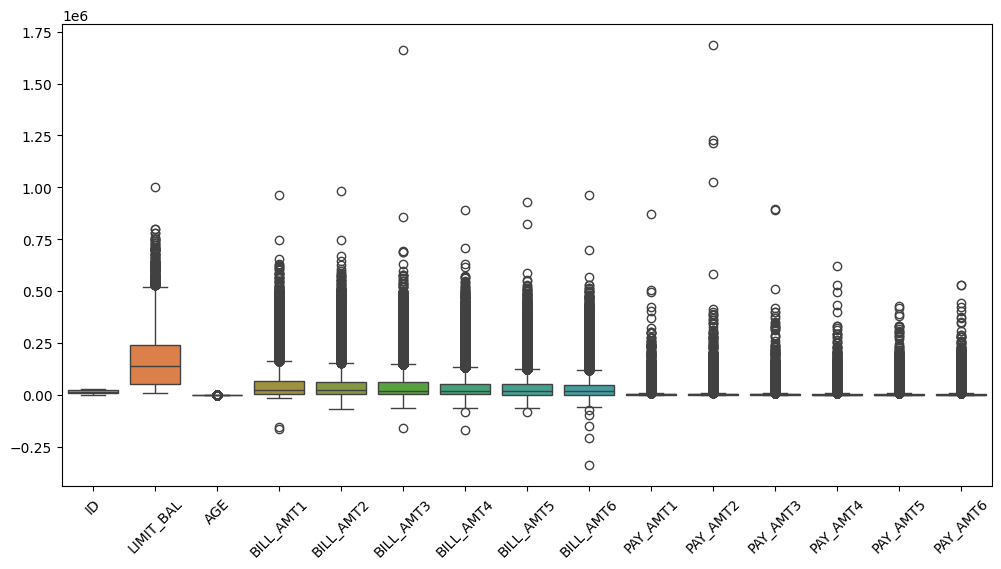

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)  # Rotation des labels pour lisibilité
plt.show()

In [51]:
# Calcul des quartiles
Q1 = df["BILL_AMT3"].quantile(0.25)
Q3 = df["BILL_AMT3"].quantile(0.75)
IQR = Q3 - Q1

# Calcul des limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df["BILL_AMT3"] < lower_bound) | (df["BILL_AMT3"] > upper_bound)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
17,18,320000,1,1,1,49,0,0,0,-1,...,70074,5856,195599,10358,10000,75940,20000,195599,50000,0
36,37,280000,1,2,1,40,0,0,0,0,...,170410,173901,177413,8026,8060,6300,6400,6400,6737,0
40,41,360000,1,1,2,33,0,0,0,0,...,628699,195969,179224,10000,7000,6000,188840,28000,4000,0
57,58,180000,2,2,1,34,0,0,0,0,...,168608,132202,129918,8083,7296,5253,4814,4816,3800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29957,29958,500000,1,2,2,31,0,0,-1,0,...,278725,89161,87863,6025,294318,10254,7524,5009,2333,0
29963,29964,610000,1,1,2,31,0,-1,2,-1,...,347303,248893,269528,323014,1605,349395,250144,271099,220076,0
29978,29979,310000,1,2,1,39,0,0,0,0,...,219409,216540,210675,10029,9218,10029,8049,8040,10059,0
29988,29989,250000,1,1,1,34,0,0,0,0,...,245750,175005,179687,65000,8800,9011,6000,7000,6009,0


In [49]:
df[df["PAY_AMT2"] > 1000000]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5296,5297,500000,2,1,1,33,-2,-2,-1,-1,...,121757,97115,377217,4366,1684259,121831,97670,379267,26759,0
25731,25732,80000,2,3,1,37,0,0,-2,-2,...,632,632,124542,215,1024516,632,632,124542,14770,0
28003,28004,510000,2,1,2,30,-1,-1,-1,-1,...,163628,117475,116656,493358,1227082,164577,510,6239,4550,0
28716,28717,340000,2,1,3,42,-1,-1,-1,-1,...,205931,265431,270237,873552,1215471,889043,621000,20000,145000,0


In [38]:
df.duplicated().sum()

0

In [39]:
df["default payment next month"].value_counts(normalize=True)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

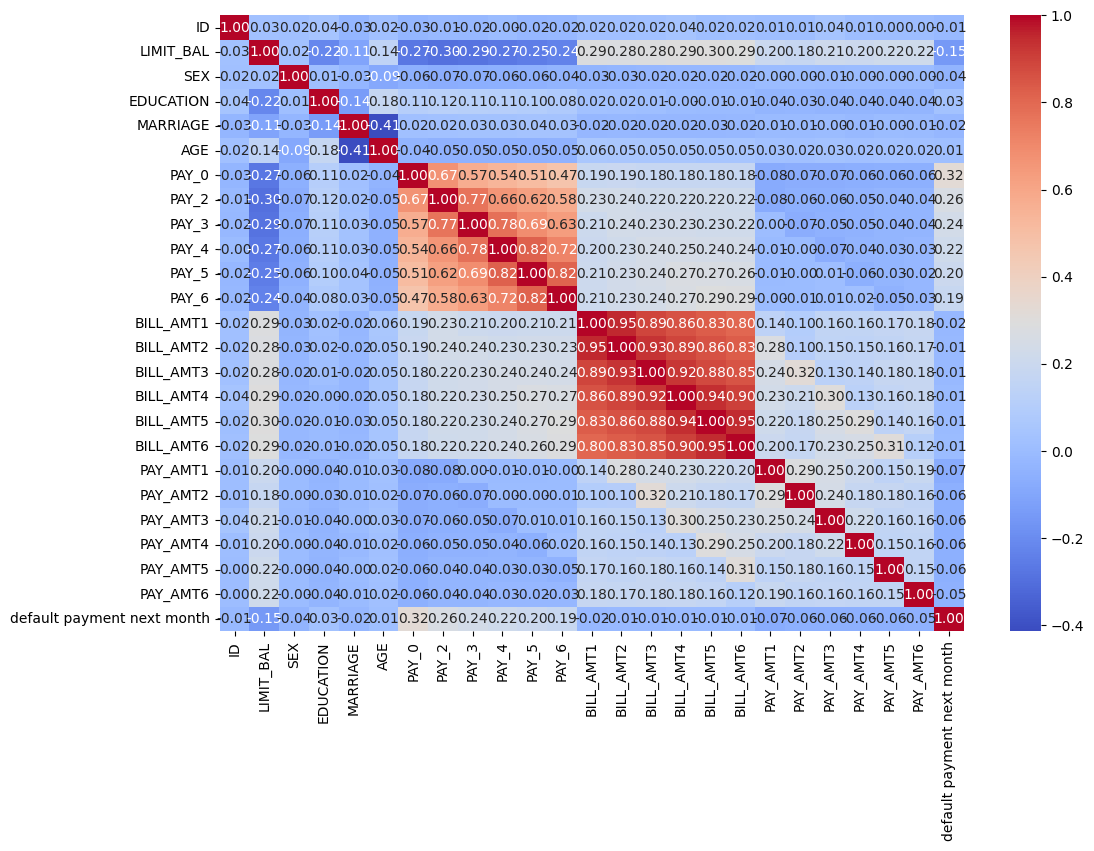

In [40]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

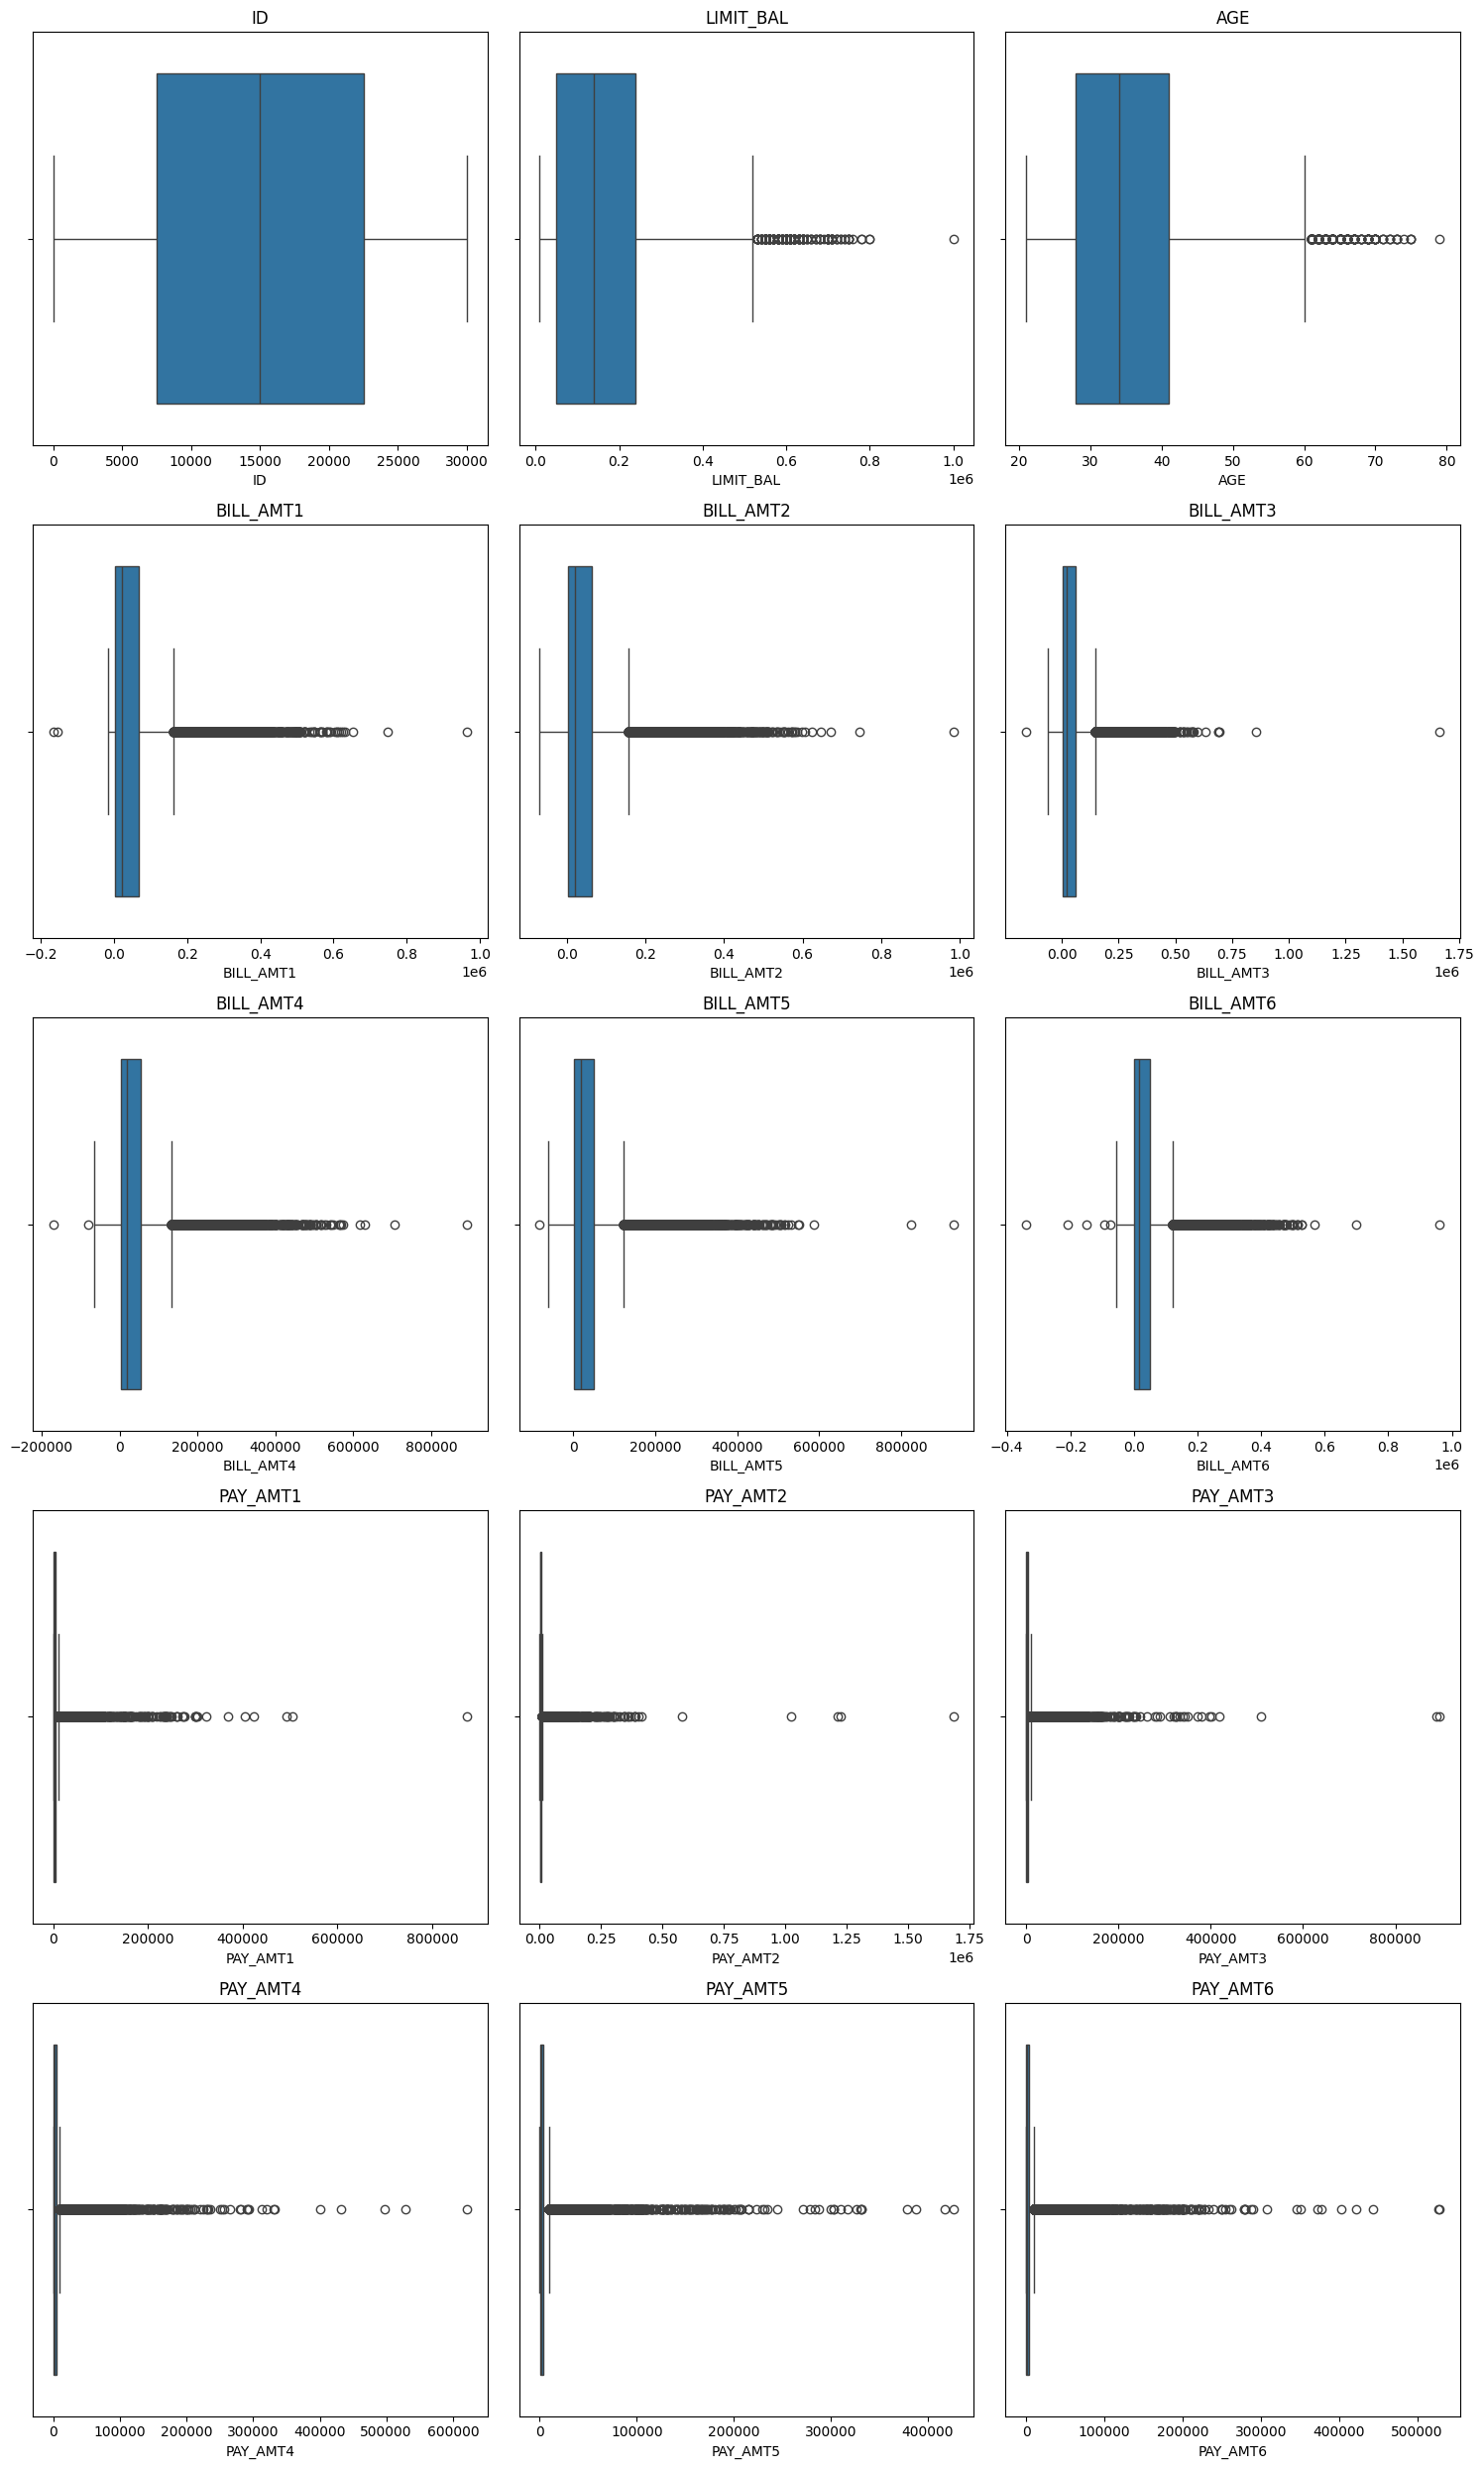

In [34]:
import math

import matplotlib.pyplot as plt
import seaborn as sns

# Nombre total de variables numériques
num_vars = len(num_cols)

# Définir le nombre de lignes et de colonnes dynamiquement
rows = math.ceil(num_vars / 3)  # On veut 3 colonnes par défaut
cols = min(num_vars, 3)  # Ne pas dépasser le nombre total de variables

# Créer les sous-plots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Aplatir la liste des axes si elle est en 2D
axes = axes.flatten() if num_vars > 1 else [axes]

# Tracer les boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Supprimer les sous-graphiques inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

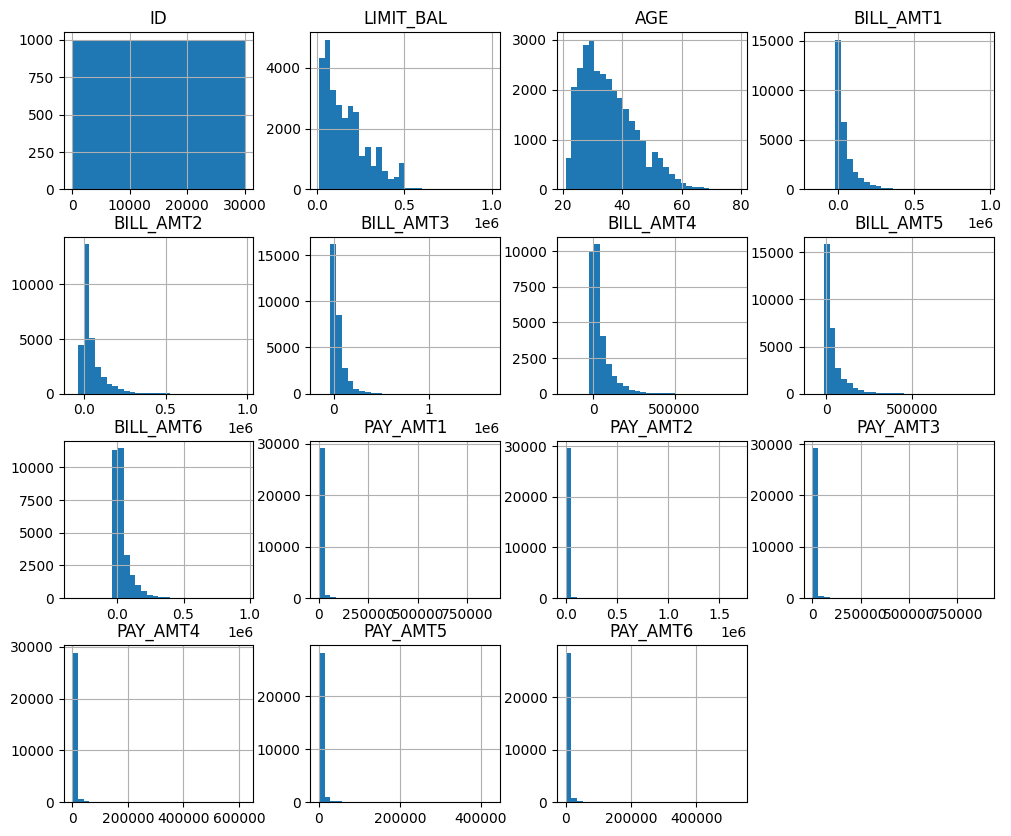

In [32]:
# Distribution des variables numériques
df[num_cols].hist(figsize=(12, 10), bins=30)
plt.show()

In [ ]:
# Analyse des variables catégoriques
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Distribution de {col}")
    plt.show()

In [ ]:
# Analyse de la variable AGE
plt.figure(figsize=(8, 4))
sns.histplot(df["AGE"], bins=20, kde=True, color="blue")
plt.title("Distribution de l'AGE")
plt.show()

In [ ]:
# Analyse de la variable cible
plt.figure(figsize=(6, 4))
sns.countplot(x=df["default payment next month"], palette="Set2")
plt.title("Distribution de la variable cible")
plt.show()

In [5]:
from pyspark.sql import functions as F

# Supposons que df soit votre DataFrame Spark
missing_values_count = df.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df.columns])

missing_values_count.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  0|        0|  0|        0|       0|  0|    0|    0|    0|    0|    0|    0|        0|        0|        0|        0|        0|        0|       0|       0|       0|       0|       0|       0|                         0|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+--

In [ ]:
import yaml
from loguru import logger
from pyspark.sql import SparkSession

from defaultccc.config import ProjectConfig
from defaultccc.data_processor import DataProcessor

config = ProjectConfig.from_yaml(config_path="../project_config.yml")

logger.info("Configuration loaded:")
logger.info(yaml.dump(config, default_flow_style=False))

# Load the dataset
# spark = SparkSession.builder.getOrCreate()
df = spark.read.load(
    f"/Volumes/{config.catalog_name}/{config.schema_name}/default_of_credit_card_clients/default_of_credit_card_clients.csv",
    format="csv",
    header="true",
    delimiter=";",
).toPandas()

# Initialize DataProcessor
data_processor = DataProcessor(df, config, spark)

# Preprocess the data
data_processor.preprocess()

# Split the data
X_train, X_test = data_processor.split_data()
logger.info("Training set shape: %s", X_train.shape)
logger.info("Test set shape: %s", X_test.shape)

# Save to catalog
logger.info("Saving data to catalog")
data_processor.save_to_catalog(X_train, X_test)

2025-02-17 17:53:28.400 | INFO     | __main__:<module>:10 - Configuration loaded:
2025-02-17 17:53:28.405 | INFO     | __main__:<module>:11 - !!python/object:defaultccc.config.ProjectConfig
__dict__:
  cat_features:
  - LIMIT_BAL
  - AGE
  - PAY_0
  - PAY_2
  - PAY_3
  - PAY_4
  - PAY_5
  - PAY_6
  - BILL_AMT1
  - BILL_AMT2
  - BILL_AMT3
  - BILL_AMT4
  - BILL_AMT5
  - BILL_AMT6
  - PAY_AMT1
  - PAY_AMT2
  - PAY_AMT3
  - PAY_AMT4
  - PAY_AMT5
  - PAY_AMT6
  catalog_name: maven_training_databricks
  experiment_name_basic: /Shared/default-ccc-basic
  experiment_name_custom: /Shared/default-ccc-custom
  experiment_name_fe: /Shared/default-ccc-fe
  num_features:
  - SEX
  - EDUCATION
  - MARRIAGE
  schema_name: default-ccc
  target: default payment next month
__pydantic_extra__: null
__pydantic_fields_set__: !!set
  cat_features: null
  catalog_name: null
  experiment_name_basic: null
  experiment_name_custom: null
  experiment_name_fe: null
  num_features: null
  schema_name: null
  targe

ParseException: 
[INVALID_IDENTIFIER] The unquoted identifier default-ccc is invalid and must be back quoted as: `default-ccc`.
Unquoted identifiers can only contain ASCII letters ('a' - 'z', 'A' - 'Z'), digits ('0' - '9'), and underbar ('_').
Unquoted identifiers must also not start with a digit.
Different data sources and meta stores may impose additional restrictions on valid identifiers. SQLSTATE: 42602 (line 1, pos 33)

== SQL ==
maven_training_databricks.default-ccc.train_set
---------------------------------^^^
